# Árvore de Decisão para tarefa de classificação

### Sobre o dataset
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


### Objetivo:
O objetivo do modelo treinado é identificar notas falsificadas.

### Algumas considerações preliminares:
Este é um projeto de classificação , pois a variável a ser prevista é binária (fraudulenta ou não).

O objetivo aqui é modelar a probabilidade de uma nota ser fraudulenta, em função de suas características.


Uma das muitas qualidades das Àrvores de Decisão é que elas exigem pouca preparação de dados. Em particular, elas não exigem o escalonamento ou a centralização das características.

In [43]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import os
import graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

### Dataset

In [9]:
df1 = pd.read_csv('bill_authentication.csv')
df1.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Visualizations

In [29]:
number_lines, number_columns = df1.shape
print(f'Numero de linhas: {number_lines} \nNumero de colunas: {number_columns}')

df1.corr(method='spearman').style.background_gradient(cmap='coolwarm')

Numero de linhas: 1372 
Numero de colunas: 5


,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.255126,-0.326704,0.241503,-0.735605
Skewness,0.255126,1.000000,-0.729426,-0.572510,-0.429016
Curtosis,-0.326704,-0.729426,1.000000,0.433299,0.061600
Entropy,0.241503,-0.572510,0.433299,1.000000,-0.032751
Class,-0.735605,-0.429016,0.061600,-0.032751,1.000000


In [44]:
# Class é nossa target, com zero indicando que a cédula está forjada e 1 indicando que é legítima
# Vamos fazer uma rapida verificação se nossa target se encontra balanceada
df1['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

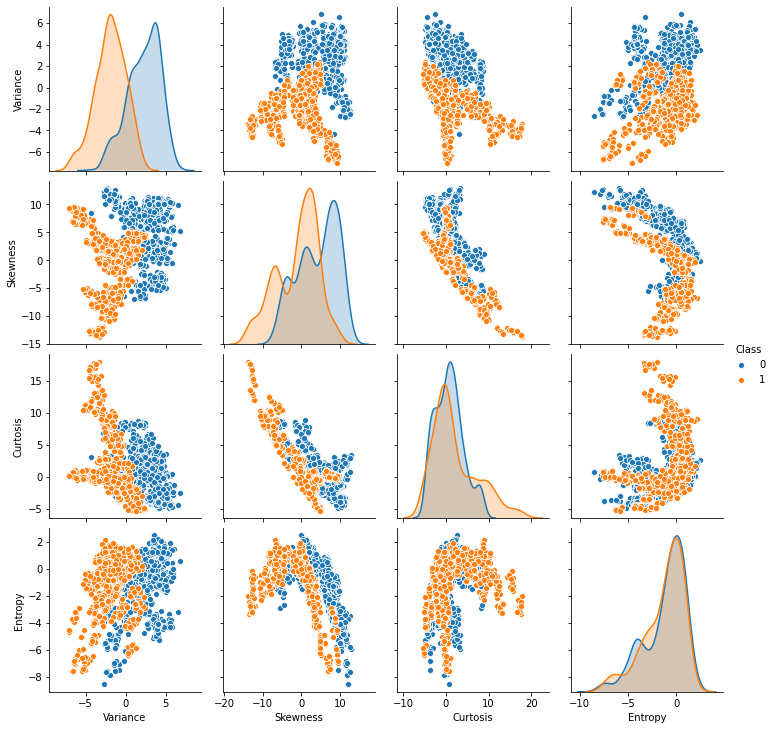

In [14]:
sns.pairplot(df1, hue="Class")

### Extracting Input and Output

In [30]:
x1 = df1.drop('Class', axis=1)
y1 = df1['Class']

In [31]:
# Separando os dados entre treinamento e teste
# Para isto, precisamos da função train_test_split da lib sklearn
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.30)

### Random Forest

In [33]:
# Treinamento da arvore de decisão para a terefa de classificação
# Instanciando o objeto com o modelo da arvore
mod_arvore1 = DecisionTreeClassifier()

# Treinando o modelo com nossos dados
mod_arvore1.fit(x_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
# Predições para a base de teste
y_pred_test1 = mod_arvore1.predict(x_test1)

In [35]:
# Avaliando os resultados
print(confusion_matrix(y_test1, y_pred_test1))
print()
print('----------------------------------------------------------------------------------')
print()
print(classification_report(y_test1, y_pred_test1))

[[230   1]
 [  7 174]]

----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       231
           1       0.99      0.96      0.98       181

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [36]:
 # Acuràcia do modelo
print('Acuracia:', round(metrics.accuracy_score(y_test1, y_pred_test1),3))

Acuracia: 0.981


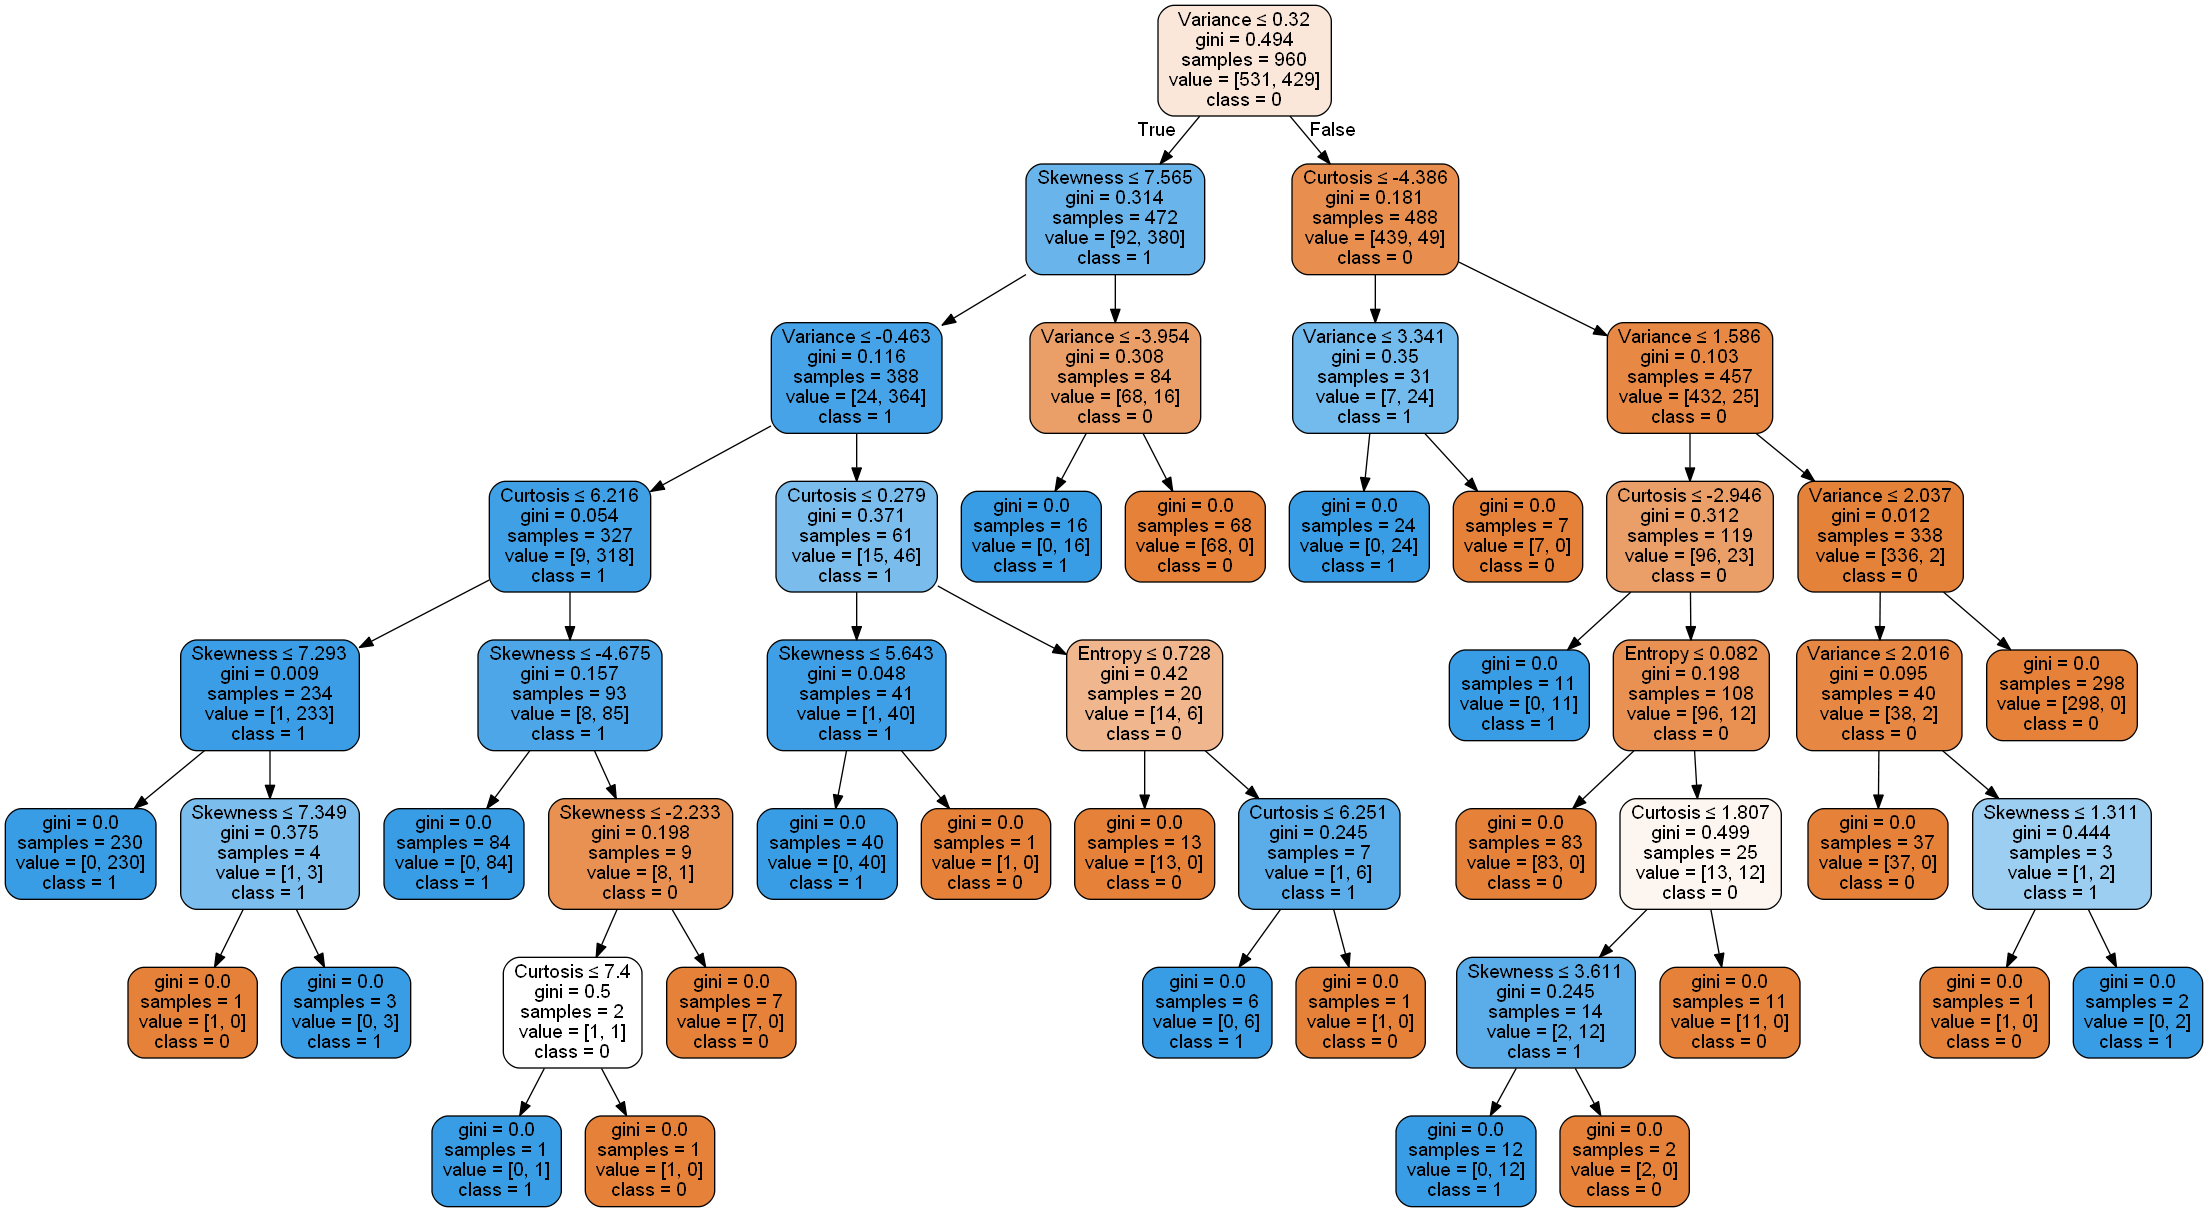

In [37]:
# Visualizando a arvore de decisão
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

dot_data = StringIO()

export_graphviz(mod_arvore1
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1.columns[0:4]
                , class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())